In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
with open("data.pickle", "rb") as input_file:
    data = pickle.load(input_file)

In [4]:
normalized_data = {}
for k, v in data.items():
    normalized_data[k] = normalize_array(data[k])

NameError: name 'normalize_array' is not defined

In [5]:
prefix = " - "
languages = ['da','de','el','en','eo','es','fi','fr','hu','it','la','nl','pt','sv','tl','zh']
languages_pretty = ['Danish','German','Greek','English','Esperanto','Spanish','Finnish','French','Hungarian','Italian','Latin','Dutch','Portugese','Swedish','Tagalog','Chinese']

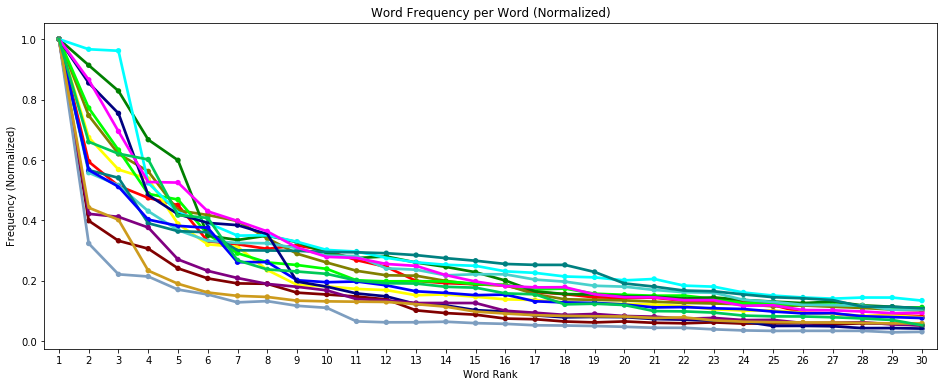

In [93]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.xlabel('Word Rank')
plt.ylabel('Frequency (Normalized)')
plt.title('Word Frequency per Word (Normalized)')
colours = ['#FF0000',
'#800000',
'#FFFF00',
'#808000',
'#00FF00',
'#008000',
'#00FFFF',
'#48D1CC',
'#008080',
'#0000FF',
'#000080',
'#FF00FF',
'#800080',
'#7D9EC0',
'#CD9B1D',
'#00C957']
i = 0
for k, v in normalized_data.items():
    plot_counts(normalized_data[k][0:30], normalized=True, line=True, held=True, color=colours[i], label=k)
    i+=1
plt.xticks([x for x in range(0,30)],[x+1 for x in range(0,30)])
plt.show()

In [96]:
with open("childrens_books_results.pickle", "rb") as input_file:
    childrens_books_results = pickle.load(input_file)

In [6]:
normalized_data_children = {}
for k, v in childrens_books_results.items():
    normalized_data_children[k] = normalize_array(childrens_books_results[k])

NameError: name 'childrens_books_results' is not defined

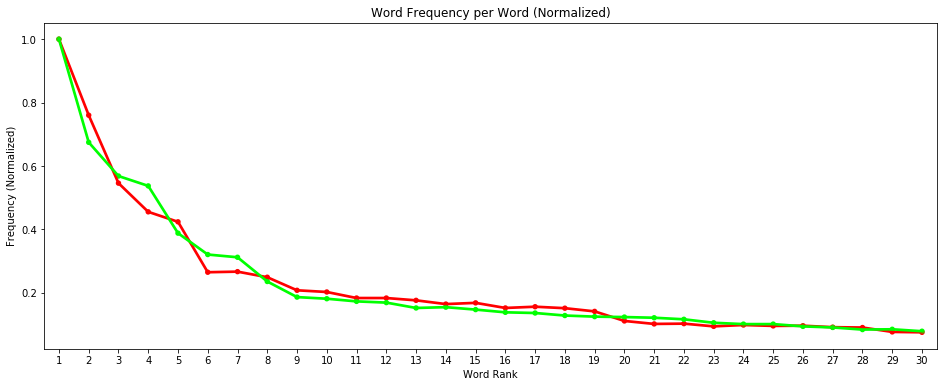

In [99]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.xlabel('Word Rank')
plt.ylabel('Frequency (Normalized)')
plt.title('Word Frequency per Word (Normalized)')
plot_counts(normalized_data_children['results'][0:30], normalized=True, line=True, held=True, color=colours[0], label=k)
plot_counts(normalized_data['en'][0:30], normalized=True, line=True, held=True, color=colours[4], label=k)

plt.xticks([x for x in range(0,30)],[x+1 for x in range(0,30)])
plt.show()

In [7]:
def normalize_array(arr):
    max_n = arr[0][1]
    new_arr = []
    for i in arr:
        new_arr.append((i[0], float(i[1])/float(max_n)))
    return new_arr

In [8]:
def plot_counts(counts_arr, title="", save_fig=False, normalized=False, line = False, held=False, color='r', label=""):
    word_arr_encoded = []
    word_arr_numbers = []
    for k, v in counts_arr:
        word_arr_encoded.append(k.encode('utf-8').decode('utf-8'))
        word_arr_numbers.append(v)
    if not held:
        plt.figure(figsize=(16, 6))
        plt.xlabel('Word')
        plt.ylabel('Frequency' +(" (Normalized)" if normalized else ""))
        plt.title('Word Frequency per Word'+prefix+title+(" (Normalized)" if normalized else ""))
    if line:
        sns.pointplot(word_arr_encoded,word_arr_numbers, sort=True, markers='.', color=color, label=label)
    else:
        sns.barplot(word_arr_encoded,word_arr_numbers)
    if save_fig:
        plt.savefig("plots/"+title+"_hist.png")

In [9]:
from scipy import stats

In [10]:
def get_slope_via_linear_regression(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    return slope, intercept

In [21]:
def loglog(counts, title="", save_fig=False, best_fit=False,held=False,color="", ax=""):
    rank = np.array([i for i in range(1,len(counts)+1)])
    word_arr_numbers = []
    for k, v in counts:
        word_arr_numbers.append(int(v))
    word_arr_numbers = np.array(word_arr_numbers)
    
    if best_fit:
        slope, intercept = get_slope_via_linear_regression(np.log(rank), np.log(word_arr_numbers))
        print title+" ======"
        print 'slope: '+str(slope)
        print 'intercept: '+str(intercept)
    if not held:
        f, ax = plt.subplots(figsize=(7, 7))

        ax.set(xscale="log", yscale="log")
        plt.xlabel('log Rank')
        plt.ylabel('log Frequency')
        plt.title('log log Relation between Rank and Frequency'+prefix + title)
    sns.scatterplot(rank, word_arr_numbers, ax=ax, color=color, markers='.')
    if save_fig:
        plt.savefig("plots/"+title+"_log.png")

In [14]:
loglog(data['da'], best_fit=True)

slope: -1.1065140441
intercept: 12.4322932211


Danish ======
slope: -1.1065140441
intercept: 12.4322932211
German ======
slope: -1.02310076458
intercept: 11.5382198333
Greek ======
slope: -0.885327680735
intercept: 9.74213256778
English ======
slope: -1.2404870116
intercept: 14.3898308657
Esperanto ======
slope: -0.904526590081
intercept: 9.80112355987
Spanish ======
slope: -1.01553367527
intercept: 11.7700835419
Finnish ======
slope: -0.923116941259
intercept: 10.4377096457
French ======
slope: -1.06738713419
intercept: 12.0472585845
Hungarian ======
slope: -0.924853157717
intercept: 10.6308511737
Italian ======
slope: -1.0192313189
intercept: 11.6339450671
Latin ======
slope: -0.992195387621
intercept: 11.8417144632
Dutch ======
slope: -1.06809845959
intercept: 12.2109579012
Portugese ======
slope: -0.925950120731
intercept: 10.6546822775
Swedish ======
slope: -0.991817924663
intercept: 11.0447747114
Tagalog ======
slope: -0.633156995084
intercept: 7.44815401119
Chinese ======
slope: -2.09051771805
intercept: 20.0941406422


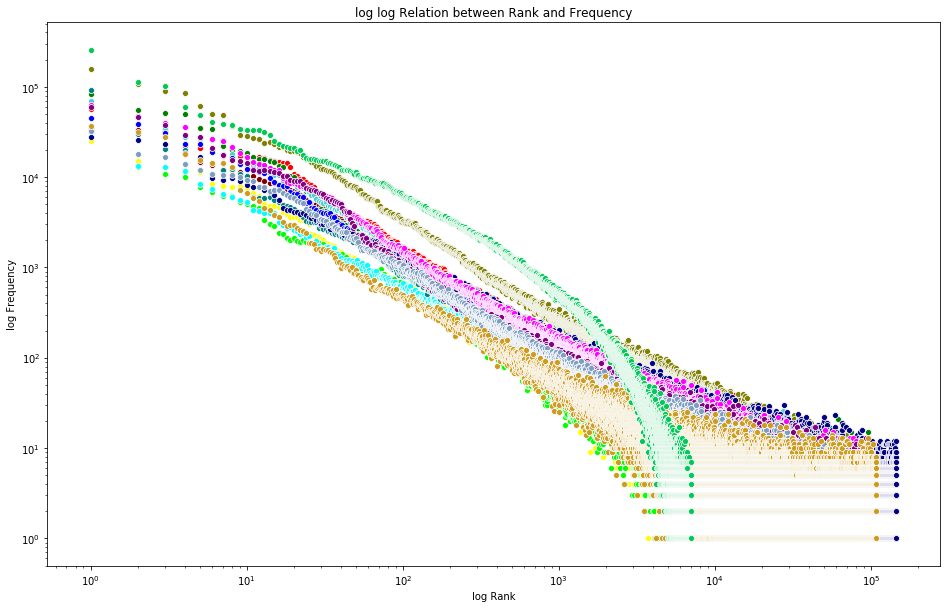

In [23]:
f, ax = plt.subplots(figsize=(16, 10))
ax.set(xscale="log", yscale="log")
plt.xlabel('log Rank')
plt.ylabel('log Frequency')
plt.title('log log Relation between Rank and Frequency')
colors = ['#FF0000',
'#800000',
'#FFFF00',
'#808000',
'#00FF00',
'#008000',
'#00FFFF',
'#48D1CC',
'#008080',
'#0000FF',
'#000080',
'#FF00FF',
'#800080',
'#7D9EC0',
'#CD9B1D',
'#00C957']
for i in range(0,len(languages)):
    loglog(data[languages[i]], languages_pretty[i], best_fit=True, held=True, ax=ax,color=colors[i])

In [ ]:
with open("childrens_books_results.pickle", "rb") as input_file:
    childrens_books_results = pickle.load(input_file)
plot_counts(childrens_books_results['results'][0:30], languages_pretty[i],True)
loglog(childrens_books_results['results'], languages_pretty[i],True)

slope: -1.21440889587
intercept: 12.8911379455
slope: -1.2404870116
intercept: 14.3898308657


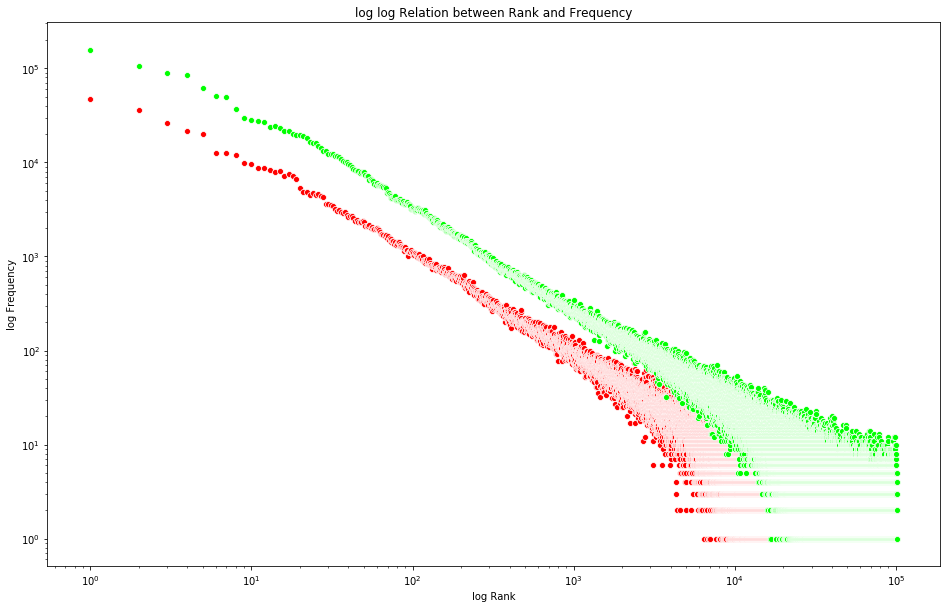

In [26]:
f, ax = plt.subplots(figsize=(16, 10))
ax.set(xscale="log", yscale="log")
plt.xlabel('log Rank')
plt.ylabel('log Frequency')
plt.title('log log Relation between Rank and Frequency')

with open("childrens_books_results.pickle", "rb") as input_file:
    childrens_books_results = pickle.load(input_file)
loglog(childrens_books_results['results'], best_fit=True, held=True, ax=ax,color=colors[0])
loglog(data['en'], best_fit=True, held=True, ax=ax,color=colors[4])